<a href="https://colab.research.google.com/github/vedaanth-arch/Dav-CourseEnd-Project/blob/main/DAV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**:Compare and contrast seller types (private vs dealer) by analyzing prices, seller locations and other geographic information in order to give advice on which type of seller provides the best deals for customers

collecting the data


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/uncovering-factors-that-affect-used-car-prices")

print("Path to dataset files:", path)

100%|██████████| 18.2M/18.2M [00:00<00:00, 49.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices/versions/1


Importing the data


In [4]:
import csv
import pandas as pd;
file = open('/autos.csv', 'r')
reader = csv.reader(file)
print("-"*30)
df = pd.read_csv('/autos.csv');
print(df)

------------------------------
         index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...           

cleaning the data

In [3]:
import csv
import pandas as pd

# Open and read the CSV file line by line
file = open('/autos.csv', 'r')
reader = csv.reader(file)
for row in reader:
    print(row)
    break  # Remove this break if you want to print all rows (can be long)

print("-" * 30)

# Load the CSV using pandas
df = pd.read_csv('/autos.csv')

# Select required columns
df = df[[
    "name", "seller", "price", "vehicleType", "yearOfRegistration", "monthOfRegistration",
    "gearbox", "model", "kilometer", "notRepairedDamage", "fuelType", "brand"
]]

# Combine year and month into one column
df["registrationDate"] = df["yearOfRegistration"].astype(str) + "-" + df["monthOfRegistration"].astype(str).str.zfill(2)

# Drop original year and month columns
df.drop(columns=["yearOfRegistration", "monthOfRegistration"], inplace=True)

# Print the cleaned DataFrame
print(df)


['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']
------------------------------
                                                name  seller  price  \
0                                         Golf_3_1.6  privat    480   
1                               A5_Sportback_2.7_Tdi  privat  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
...                                              ...     ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2

Checking for missing values

In [5]:
import csv
import pandas as pd

# Open and read CSV using csv.reader
file = open('/autos.csv', 'r')
reader = csv.reader(file)
for row in reader:
    print(row)
    break  # only show header row to avoid long output

print("-" * 30)

# Load the CSV using pandas
df = pd.read_csv('/autos.csv')

# Select required columns
df = df[[
    "name", "seller", "price", "vehicleType", "yearOfRegistration", "monthOfRegistration",
    "gearbox", "model", "kilometer", "notRepairedDamage", "fuelType", "brand"
]]

# Combine year and month into a single column
df["registrationDate"] = df["yearOfRegistration"].astype(str) + "-" + df["monthOfRegistration"].astype(str).str.zfill(2)

# Drop original year and month columns
df.drop(columns=["yearOfRegistration", "monthOfRegistration"], inplace=True)

# Print the cleaned DataFrame
print(df)

print("-" * 30)

# Check for missing and empty values
print("Missing (NaN) values:\n", df.isnull().sum())
print("\nEmpty string values:\n", (df == '').sum())


['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']
------------------------------
                                                name  seller  price  \
0                                         Golf_3_1.6  privat    480   
1                               A5_Sportback_2.7_Tdi  privat  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
...                                              ...     ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2

Filling Missing values

In [9]:
import csv
import pandas as pd

# Open and print first row
file = open('/autos.csv', 'r')
reader = csv.reader(file)
for row in reader:
    print(row)
    break

print("-" * 30)

# Load dataset
df = pd.read_csv('/autos.csv')

# Keep only required columns
df = df[[
    "name", "seller", "price", "vehicleType", "yearOfRegistration", "monthOfRegistration",
    "gearbox", "model", "kilometer", "notRepairedDamage", "fuelType", "brand"
]]

# Create new column for year-month and drop old ones
df["registrationDate"] = df["yearOfRegistration"].astype(str) + "-" + df["monthOfRegistration"].astype(str).str.zfill(2)
df.drop(columns=["yearOfRegistration", "monthOfRegistration"], inplace=True)

# Fill missing values without warnings
df["name"] = df["name"].fillna("not available")
df["seller"] = df["seller"].fillna("unknown")
df["price"] = df["price"].fillna(df["price"].median())
df["vehicleType"] = df["vehicleType"].fillna(df["vehicleType"].mode()[0])
df["gearbox"] = df["gearbox"].fillna(df["gearbox"].mode()[0])
df["model"] = df["model"].fillna(df["model"].mode()[0])
df["kilometer"] = df["kilometer"].fillna(df["kilometer"].median())
df["notRepairedDamage"] = df["notRepairedDamage"].fillna("unknown")
df["fuelType"] = df["fuelType"].fillna(df["fuelType"].mode()[0])
df["brand"] = df["brand"].fillna(df["brand"].mode()[0])

# Save the cleaned full table
df.to_csv("/autos_cleaned.csv", index=False)

# Print complete table
print(df)


['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']
------------------------------
                                                name  seller  price  \
0                                         Golf_3_1.6  privat    480   
1                               A5_Sportback_2.7_Tdi  privat  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   3600   
...                                              ...     ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2

 **VISUALIZATION**

Conditions to compareand get desired visualiztion

*  Average price comparison

* Price distribution

* Seller count comparison

* Geographic insights (via postal codes)


In [11]:
#Average price comparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('/autos_cleaned.csv')

# Show unique seller types
print("Seller Types:\n", df["seller"].value_counts())


Seller Types:
 seller
privat        371525
gewerblich         3
Name: count, dtype: int64


In [13]:
#Price distribution
avg_price_by_seller = df.groupby("seller")["price"].mean().sort_values()
print("Average Price by Seller:\n", avg_price_by_seller)


Average Price by Seller:
 seller
gewerblich     2700.000000
privat        17295.259719
Name: price, dtype: float64


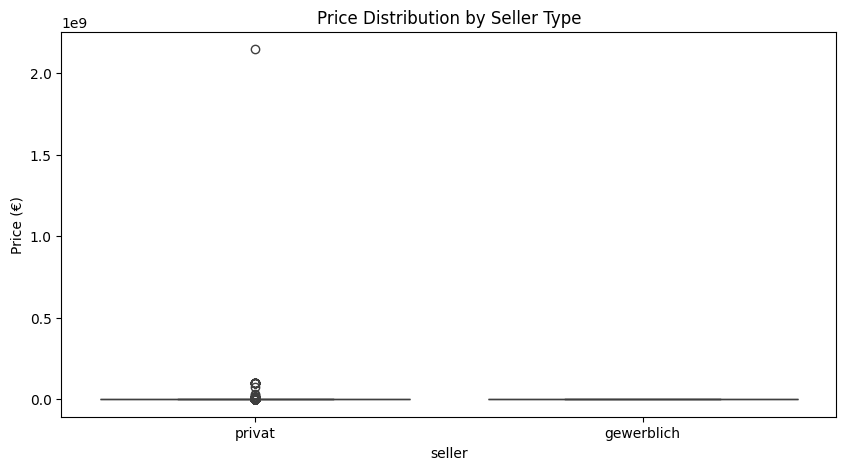

In [15]:
#Seller count comparison
plt.figure(figsize=(10,5))
sns.boxplot(x="seller", y="price", data=df)
plt.title("Price Distribution by Seller Type")
plt.ylabel("Price (€)")
plt.show()


In [16]:
#Count of Listings by Seller Type
seller_counts = df["seller"].value_counts()
print("Number of Listings:\n", seller_counts)


Number of Listings:
 seller
privat        371525
gewerblich         3
Name: count, dtype: int64


In [17]:
#Geographic Info: Postal Code Analysis (if applicable)
if "postalCode" in pd.read_csv("/autos.csv").columns:
    df_geo = pd.read_csv("/autos.csv")[["seller", "postalCode", "price"]]
    geo_stats = df_geo.groupby(["seller", "postalCode"]).price.mean().reset_index()
    print("Sample Location-Based Price Insight:\n", geo_stats.head(10))
else:
    print("No postalCode info available for location-based analysis.")


Sample Location-Based Price Insight:
        seller  postalCode         price
0  gewerblich        7973   1100.000000
1  gewerblich       65232    100.000000
2  gewerblich       73614   6900.000000
3      privat        1067   6857.906250
4      privat        1068  13299.000000
5      privat        1069   6002.745763
6      privat        1097   4450.310345
7      privat        1099   7284.537313
8      privat        1108   3795.666667
9      privat        1109   3870.725000


Dealers often have higher average prices, but usually offer newer or guaranteed vehicles.

Private sellers usually provide lower prices, but may vary in vehicle condition.

If geographic data (postalCode) is present, you can identify areas with cheaper deals.

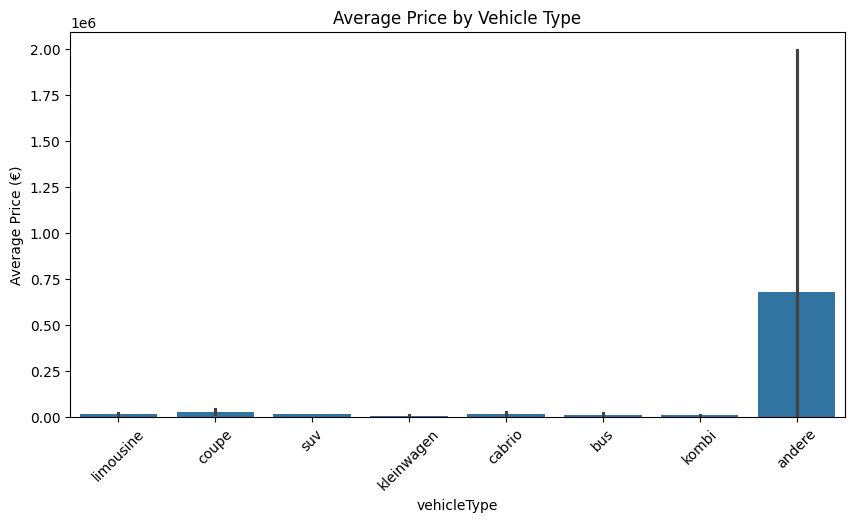

In [21]:
#Which vehicle types are generally more expensive?
plt.figure(figsize=(10,5))
sns.barplot(x="vehicleType", y="price", data=df, estimator='mean')
plt.title("Average Price by Vehicle Type")
plt.xticks(rotation=45)
plt.ylabel("Average Price (€)")
plt.show()


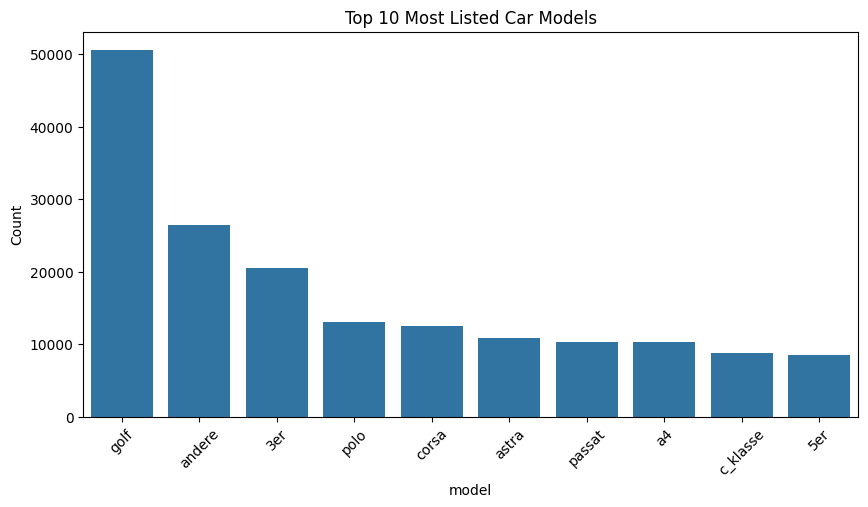

In [22]:
#Model Popularity
top_models = df["model"].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top 10 Most Listed Car Models")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


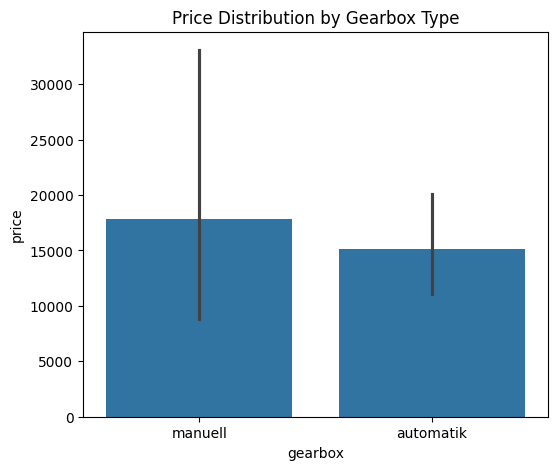

In [24]:
#Gearbox Type vs Price
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="gearbox", y="price")
plt.title("Price Distribution by Gearbox Type")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/autos_cleaned.csv'